Install the Kaggle API: Run the following code to install the Kaggle API:

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Configure the API key:

In [2]:
from google.colab import files

files.upload()  # upload the Kaggle API key

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Download the dataset:

In [3]:
!kaggle datasets download -d shuyangli94/food-com-recipes-and-user-interactions


 99% 266M/267M [00:10<00:00, 31.1MB/s]
100% 267M/267M [00:10<00:00, 26.9MB/s]


Extract the dataset:

In [4]:
!unzip food-com-recipes-and-user-interactions.zip


Archive:  food-com-recipes-and-user-interactions.zip
  inflating: PP_recipes.csv          
  inflating: PP_users.csv            
  inflating: RAW_interactions.csv    
  inflating: RAW_recipes.csv         
  inflating: ingr_map.pkl            
  inflating: interactions_test.csv   
  inflating: interactions_train.csv  
  inflating: interactions_validation.csv  


Preprocess the data:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PP_recipes = pd.read_csv('/content/PP_recipes.csv')
RAW_recipes = pd.read_csv('/content/RAW_recipes.csv')
RAW_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [6]:
# Check for duplicates
duplicates = RAW_recipes[RAW_recipes.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows: ", len(duplicates))


Number of duplicate rows:  0


In [7]:
# Check for missing values
missing_values = RAW_recipes.isnull().sum()

# Print the number of missing values in each column
print(missing_values)


name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64


In [8]:
# Drop the rows with missing values
df = RAW_recipes.dropna()

# Save the cleaned dataset
RAW_recipes.to_csv("cleaned_recipe_dataset.csv", index=False)


In [9]:
# Get the column names
column_names = RAW_recipes.columns

print(column_names)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


In [10]:
#Drop irrelevant columns
df = RAW_recipes.drop(['id', 'contributor_id', 'submitted', 'tags', 'nutrition', 'description', 'n_ingredients'], axis=1)
df.head(10)


,name,minutes,n_steps,steps,ingredients
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n..."
4,amish tomato ketchup for canning,190,5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar..."
5,apple a day milk shake,0,4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju..."
6,aww marinated olives,15,4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'..."
7,backyard style barbecued ribs,120,10,['in a medium saucepan combine all the ingredi...,"['pork spareribs', 'soy sauce', 'fresh garlic'..."
8,bananas 4 ice cream pie,180,8,"['crumble cookies into a 9-inch pie plate , or...","['chocolate sandwich style cookies', 'chocolat..."
9,beat this banana bread,70,12,"['preheat oven to 350 degrees', 'butter two 9x...","['sugar', 'unsalted butter', 'bananas', 'eggs'..."


In [11]:
#Check the data types

df.dtypes

name           object
minutes         int64
n_steps         int64
steps          object
ingredients    object
dtype: object

To analyze the minutes column, we can use the pandas describe() method to get statistical information such as the count, mean, and standard deviation of the column:

In [12]:
print(df['minutes'].describe())

count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64


The minimum time required is 0 minutes and the maximum time is 2.14 billion minutes, which is unlikely to be correct.

The mean value of 9,398 minutes is also very high, indicating that there may be some extreme values that are affecting the average. The standard deviation is also very large, which supports this hypothesis.

To analyze the 'minutes' column further, we can create a histogram to visualize the distribution of values.

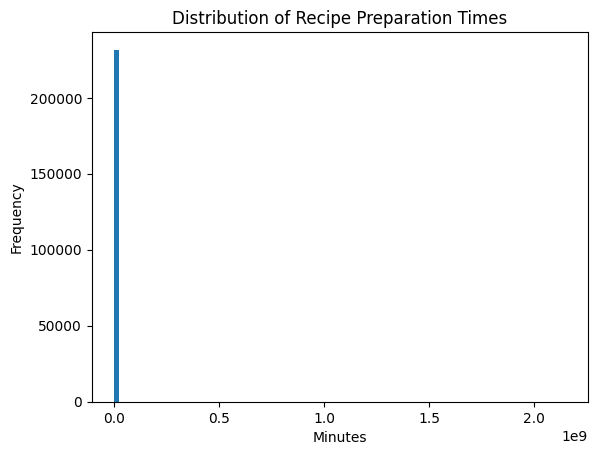

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['minutes'], bins=100)
plt.title('Distribution of Recipe Preparation Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()


In [14]:
zero_minutes = df[df['minutes'] == 0]
zero_minutes

,name,minutes,n_steps,steps,ingredients
5,apple a day milk shake,0,4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju..."
2451,acorn magic delights,0,13,"['melt the butter or margarine over low heat',...","['butter', 'brown sugar', 'pecans', 'all-purpo..."
3079,albanian byrek,0,14,"['prepare the dough with flour , 1 and a half ...","['flour', 'water', 'oil', 'vinegar', 'salt', '..."
3193,alfredo sauce with pasta,0,8,['cook noodles or fettuccine according to pack...,"['butter', 'heavy cream', 'parmesan cheese', '..."
3259,alice s doughnuts,0,17,"['in a large bowl , beat the eggs until foamy'...","['eggs', 'sugar', 'milk', 'shortening', 'vanil..."
...,...,...,...,...,...
230372,zesty beef and bean wedges,0,9,"['heat oven to 375', 'combine beef , beans , m...","['ground round', 'chili hot beans', 'southwest..."
230714,zippy cauliflower,0,12,"['preheat oven to 350f', 'steam cauliflower ju...","['cauliflower', 'low-fat margarine', 'all-purp..."
230761,zippy tomato sauce,0,5,"['melt margarine in a small saucepan', 'add gr...","['margarine', 'green bell pepper', 'onion', 't..."
230854,zucchini tomato casserole,0,7,"['preheat oven to 350f', 'steam zucchini until...","['zucchini', 'pepper', 'chives', 'low-fat marg..."


In [15]:
#count the number of occurrences of each unique value in the minutes column, 
#and then divide the count of 0 by the total number of rows to get the ratio
zero_ratio = df['minutes'].value_counts(normalize=True).loc[0]
print(f"Ratio of rows with 0 minutes: {zero_ratio:.2f}")

Ratio of rows with 0 minutes: 0.00


In [16]:
# Calculate the ratio of rows with 0 or missing 'minutes'
ratio = np.mean((df['minutes'] == 0) | df['minutes'].isnull())
print("Ratio of rows with 0 or missing minutes:", ratio)


Ratio of rows with 0 or missing minutes: 0.004722906962186525


Leave the missing or 0 values as is, but to flag them as missing so that the chatbot can provide an appropriate response if someone asks about the missing time information.

In [17]:
# create a new column 'missing_minutes'
df['missing_minutes'] = False

# flag rows with 0 or missing minutes
df.loc[df['minutes'].isna() | (df['minutes'] == 0), 'missing_minutes'] = True

df

,name,minutes,n_steps,steps,ingredients,missing_minutes
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",False
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",False
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",False
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",False
4,amish tomato ketchup for canning,190,5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",False
...,...,...,...,...,...,...
231632,zydeco soup,60,7,"['heat oil in a 4-quart dutch oven', 'add cele...","['celery', 'onion', 'green sweet pepper', 'gar...",False
231633,zydeco spice mix,5,1,['mix all ingredients together thoroughly'],"['paprika', 'salt', 'garlic powder', 'onion po...",False
231634,zydeco ya ya deviled eggs,40,7,"['in a bowl , combine the mashed yolks and may...","['hard-cooked eggs', 'mayonnaise', 'dijon must...",False
231635,cookies by design cookies on a stick,29,9,['place melted butter in a large mixing bowl a...,"['butter', 'eagle brand condensed milk', 'ligh...",False


In [18]:
#Let's find the maximum minute recipe:
max_minutes_recipe = df.loc[df['minutes'].idxmax()]
print(max_minutes_recipe)


name                                           no bake granola balls
minutes                                                   2147483647
n_steps                                                            9
steps              ['preheat the oven to 350 degrees', 'spread oa...
ingredients        ['rolled oats', 'unsweetened dried shredded co...
missing_minutes                                                False
Name: 144074, dtype: object


In [19]:
print(df.loc[144074, 'steps'])

['preheat the oven to 350 degrees', 'spread oats and coconut on a cookie sheet', 'place in the oven and toast for about 12 minutes , stirring twice , until lightly browned', 'meanwhile , combine the peanut butter , honey and brown sugar in a saucepan over medium heat , stirring continuously , until ingredients are thoroughly blended and sugar has completely melted', 'add the toasted oats and coconut to the peanut butter mixture , followed by the nuts , raisins and cranberries', 'stir to combine', 'set aside to cool for about 10 minutes', 'working with dampened hands , shape into bite sized balls and refrigerate for an hour', 'i usually let mine sit out for about 15 minutes prior to serving as we like them a little gooey just like my mighty nuts']


Based on the steps provided, it seems that the actual cooking time is much less than the given value of 2147483647 minutes. 

In [20]:
df.loc[144074, 'minutes'] = 120

#sort the dataframe by the 'minutes' column in descending order

df_sorted = df.sort_values('minutes', ascending=False)
print(df_sorted.head(10))



                                                 name  minutes  n_steps  \
109624                      how to preserve a husband  1051200        9   
106563                         homemade fruit liquers   288000       12   
38116   celtic druid s honey mead   meade   metheglin   259260       18   
106963                               homemade vanilla   259205        9   
155044                                   peach brandy   216015        9   
5497                                 angelica liqueur   201610        7   
177906                                        rumtopf   187200       16   
170999                              raspberry liqueur   172810        7   
53721                                cinnamon extract   172800        5   
102299                               hard apple cider   167040       11   

                                                    steps  \
109624  ['be careful in your selection', "don't choose...   
106563  ['rinse the fruit or berries , fruit must be

In [21]:
print(df.loc[106563, 'steps'])

['rinse the fruit or berries , fruit must be cut into small pieces', 'place berries or fruit in a container , add vodka', 'cap and store in a cool , dark place , stir once a week for 2 - 4 weeks', 'strain through metal colander', 'transfer the unsweetened liqueur to an aging container', 'to 3 cups ml unsweetened liqueur add 1 1 / 4 cup granulated sugar', 'let age for at least three months', 'pour carefully the clear liqueur to a new bottle', 'add more sugar if necessary', 'the flavor of almost all liqueurs improves during storage', 'fruit and berry liqueurs should be stored for at least 6 months for maximum taste', 'some lemon liqueurs should not be stored for a long time']


In [22]:
df = df.drop(109624)

To analyze the name column, we can use the pandas value_counts() method to get the frequency of each recipe name:

In [23]:
print(df['name'].value_counts())

crock pot lemon garlic chicken                  3
gluten free chocolate chip cookies              3
chocolate peanut butter cookies                 3
three bean chili                                3
pop up rolls                                    3
                                               ..
easy pineapple cake                             1
easy pineapple chicken                          1
easy pineapple chili                            1
easy pineapple dessert                          1
cookies by design   sugar shortbread cookies    1
Name: name, Length: 230184, dtype: int64


In [24]:
# create a Boolean mask for duplicate recipe names
duplicate_mask = df['name'].duplicated(keep=False)

# create a new DataFrame with duplicate rows
duplicate_df = df[duplicate_mask]

# print the first 10 rows of the duplicate DataFrame
print(duplicate_df.head(10))


                        name  minutes  n_steps  \
16            chile rellenos       45        9   
60             mexican pasta       25        5   
106               wacky cake       40        7   
176  cream  of mushroom soup       40        8   
317                apple pie    43200        2   
466               moose milk       10        2   
554     the ultimate brownie       55        8   
600  cream  of mushroom soup       10        3   
698         hot kielbasa dip       15        5   
699         minestrone salad       20        9   

                                                 steps  \
16   ['drain green chiles', 'sprinkle cornstarch on...   
60   ['boil pasta as directed on package', 'drain a...   
106  ['sift together and make 3 holes in dry ingred...   
176  ['in a 4 quart pot , saut the mushrooms in but...   
317  ['mix ingredence together except everclear and...   
466  ['mix ingredients in a punchbowl , adding nutm...   
554  ['preheat your oven to 365 degrees f a

In [25]:
duplicate_df.shape

(2881, 6)

To compare the information of the duplicate recipes, we can create a function that takes in a dataframe and a list of recipe names, and returns a new dataframe containing the information of the recipes with those names. We can then use this function to compare the information of the duplicate recipes.

In [26]:
def get_recipe_info(df, recipe_names):
    """
    Returns a new dataframe containing the information of the recipes with the given names.
    """
    mask = df['name'].isin(recipe_names)
    return df.loc[mask, :]

duplicate_recipe_names = duplicate_df['name'].unique()
duplicate_recipe_info = get_recipe_info(df, duplicate_recipe_names)
duplicate_recipe_info.head(20)

,name,minutes,n_steps,steps,ingredients,missing_minutes
16,chile rellenos,45,9,"['drain green chiles', 'sprinkle cornstarch on...","['egg roll wrap', 'whole green chilies', 'chee...",False
60,mexican pasta,25,5,"['boil pasta as directed on package', 'drain a...","['fettuccine pasta', 'cheddar cheese soup', 'm...",False
106,wacky cake,40,7,['sift together and make 3 holes in dry ingred...,"['flour', 'sugar', 'cocoa', 'baking soda', 'sa...",False
176,cream of mushroom soup,40,8,"['in a 4 quart pot , saut the mushrooms in but...","['mushrooms', 'margarine', 'garlic cloves', 'd...",False
317,apple pie,43200,2,['mix ingredence together except everclear and...,"['apple juice', 'raw honey', 'whole cloves', '...",False
466,moose milk,10,2,"['mix ingredients in a punchbowl , adding nutm...","['eggnog', 'dark rum', 'half-and-half cream', ...",False
554,the ultimate brownie,55,8,['preheat your oven to 365 degrees f and greas...,"['unsweetened chocolate squares', 'butter', 'e...",False
600,cream of mushroom soup,10,3,"['place walnuts , garlic water , nama shoyu , ...","['walnuts', 'garlic', 'water', 'shoyu', 'rosem...",False
698,hot kielbasa dip,15,5,['microwave cream cheese for 1 minute or until...,"['cream cheese', 'sour cream', 'milk', 'mayonn...",False
699,minestrone salad,20,9,['cook pasta to desired doneness as directed o...,"['bow tie pasta', 'red kidney beans', 'peppero...",False


There are differences between duplicates, let's keep the duplicates but add a column indicating that they are duplicate recipes.

In [27]:
# Create a new column 'duplicate' and fill it with 'duplicate' for all duplicate recipes
duplicate_df['duplicate'] = 'duplicate'
duplicate_df

<ipython-input-27-bcd2531edcfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['duplicate'] = 'duplicate'


,name,minutes,n_steps,steps,ingredients,missing_minutes,duplicate
16,chile rellenos,45,9,"['drain green chiles', 'sprinkle cornstarch on...","['egg roll wrap', 'whole green chilies', 'chee...",False,duplicate
60,mexican pasta,25,5,"['boil pasta as directed on package', 'drain a...","['fettuccine pasta', 'cheddar cheese soup', 'm...",False,duplicate
106,wacky cake,40,7,['sift together and make 3 holes in dry ingred...,"['flour', 'sugar', 'cocoa', 'baking soda', 'sa...",False,duplicate
176,cream of mushroom soup,40,8,"['in a 4 quart pot , saut the mushrooms in but...","['mushrooms', 'margarine', 'garlic cloves', 'd...",False,duplicate
317,apple pie,43200,2,['mix ingredence together except everclear and...,"['apple juice', 'raw honey', 'whole cloves', '...",False,duplicate
...,...,...,...,...,...,...,...
231519,zucchini carrot muffins,40,9,"['preheat oven to 350f spray the muffin tins',...","['all-purpose flour', 'baking soda', 'baking p...",False,duplicate
231524,zucchini chocolate chip muffins,30,6,"['combine flour , sugar , baking soda , cinnam...","['flour', 'sugar', 'baking soda', 'cinnamon', ...",False,duplicate
231526,zucchini cilantro dip,30,11,['place grated zucchini in colander and sprink...,"['zucchini', 'salt', 'plain yogurt', 'sour cre...",False,duplicate
231536,zucchini lime bread,70,16,"['preheat oven to 325', 'spray or grease 2 loa...","['slivered almonds', 'lime', 'cardamom', 'swee...",False,duplicate


In [28]:
df['duplicate'] = df.duplicated(subset=['name','ingredients','steps'], keep=False)
df.head(10)


,name,minutes,n_steps,steps,ingredients,missing_minutes,duplicate
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",False,False
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",False,False
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",False,False
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",False,False
4,amish tomato ketchup for canning,190,5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",False,False
5,apple a day milk shake,0,4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",True,False
6,aww marinated olives,15,4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",False,False
7,backyard style barbecued ribs,120,10,['in a medium saucepan combine all the ingredi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",False,False
8,bananas 4 ice cream pie,180,8,"['crumble cookies into a 9-inch pie plate , or...","['chocolate sandwich style cookies', 'chocolat...",False,False
9,beat this banana bread,70,12,"['preheat oven to 350 degrees', 'butter two 9x...","['sugar', 'unsalted butter', 'bananas', 'eggs'...",False,False


In order to preprocess the text data we should first convert text to lowercase 

In [29]:
# Convert text to lowercase
df['steps'] = df['steps'].str.lower()
df['ingerdients'] = df['ingredients'].str.lower()
# Replace NaN values with empty strings
df['name'] = df['name'].fillna('')

# Convert 'name' column to lowercase
df['name'] = df['name'].str.lower()


In [31]:
import string

# Convert text to lowercase
df['name'] = df['name'].str.lower()

# Remove punctuation from name column
df['name'] = df['name'].str.replace('[{}]'.format(string.punctuation), '')

# Remove punctuation from steps column
df['steps'] = df['steps'].str.replace('[{}]'.format(string.punctuation), '')

# Remove punctuation from ingredients column
df['ingredients'] = df['ingredients'].str.replace('[{}]'.format(string.punctuation), '')
df.head(5)

<ipython-input-31-4341138b1ac1>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace('[{}]'.format(string.punctuation), '')
<ipython-input-31-4341138b1ac1>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['steps'] = df['steps'].str.replace('[{}]'.format(string.punctuation), '')
<ipython-input-31-4341138b1ac1>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ingredients'] = df['ingredients'].str.replace('[{}]'.format(string.punctuation), '')


,name,minutes,n_steps,steps,ingredients,missing_minutes,duplicate,ingerdients
0,arriba baked winter squash mexican style,55,11,make a choice and proceed with recipe dependin...,winter squash mexican seasoning mixed spice ho...,False,False,"['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,30,9,preheat oven to 425 degrees f press dough into...,prepared pizza crust sausage patty eggs milk s...,False,False,"['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,130,6,brown ground beef in large pot add chopped oni...,ground beef yellow onions diced tomatoes tomat...,False,False,"['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,45,11,place potatoes in a large pot of lightly salte...,spreadable cheese with garlic and herbs new po...,False,False,"['spreadable cheese with garlic and herbs', 'n..."
4,amish tomato ketchup for canning,190,5,mix all ingredients boil for 2 1 2 hours or ...,tomato juice apple cider vinegar sugar salt pe...,False,False,"['tomato juice', 'apple cider vinegar', 'sugar..."


In [32]:
# Define a dictionary of contractions and their expanded forms
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what's": "what is",
    "when'd": "when did",
    "when'll": "when will",
    "when's": "when is",
    "where'd": "where did",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

# Function to expand contractions in text
def expand_contractions(text):
  words = text.split()
  expanded_words = [contractions_dict.get(word, word) for word in words]
  return ' '.join(expanded_words)

# Apply the expand_contractions function
# Specify the columns to apply the function to
columns_to_process = ['name', 'steps', 'ingredients']

# Apply the function to the specified columns
df[columns_to_process] = df[columns_to_process].applymap(expand_contractions)

In [33]:
# Define a dictionary of special characters and their corresponding replacements
special_char_dict = {'#': ' ', '@': ' ', '%': ' '}

# Loop through the columns you want to process
for col in ['name', 'steps', 'ingredients']:
    # Replace special characters in each column using the defined dictionary
    df[col] = df[col].str.replace('|'.join(special_char_dict.keys()), 
                                  lambda x: special_char_dict[x.group()], 
                                  regex=True)


In [34]:
# Loop through the columns you want to process
for col in ['name', 'steps', 'ingredients']:
    # Remove numbers from each column
    df[col] = df[col].str.replace(r'\d+', '', regex=True)
df.head(5)

,name,minutes,n_steps,steps,ingredients,missing_minutes,duplicate,ingerdients
0,arriba baked winter squash mexican style,55,11,make a choice and proceed with recipe dependin...,winter squash mexican seasoning mixed spice ho...,False,False,"['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,30,9,preheat oven to degrees f press dough into th...,prepared pizza crust sausage patty eggs milk s...,False,False,"['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,130,6,brown ground beef in large pot add chopped oni...,ground beef yellow onions diced tomatoes tomat...,False,False,"['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,45,11,place potatoes in a large pot of lightly salte...,spreadable cheese with garlic and herbs new po...,False,False,"['spreadable cheese with garlic and herbs', 'n..."
4,amish tomato ketchup for canning,190,5,mix all ingredients boil for hours or until...,tomato juice apple cider vinegar sugar salt pe...,False,False,"['tomato juice', 'apple cider vinegar', 'sugar..."


To analyze the steps column, we can use NLP techniques such as tokenization and word frequency analysis. The nltk library provides a variety of tools for NLP tasks, such as the word_tokenize() and FreqDist() methods:

In [35]:
import nltk
nltk.download('punkt')

# Tokenize the text columns
steps_tokens = df['steps'].apply(nltk.word_tokenize)
ing_tokens = df['ingredients'].apply(nltk.word_tokenize)
name_tokens = df['name'].apply(nltk.word_tokenize)


# Calculate the frequency of each word
steps_freq = nltk.FreqDist([word.lower() for tokens in steps_tokens for word in tokens])
ing_freq = nltk.FreqDist([word.lower() for tokens in ing_tokens for word in tokens])
name_freq = nltk.FreqDist([word.lower() for tokens in name_tokens for word in tokens])

# Print the top 10 most frequent words
print(steps_freq.most_common(3), ing_freq.most_common(3), name_freq.most_common(3))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('and', 1137709), ('the', 1063035), ('in', 598594)] [('salt', 126149), ('pepper', 118941), ('sugar', 93034)] [('and', 30217), ('with', 26640), ('chicken', 22966)]


In [36]:
df['steps_tokens'] = steps_tokens
df['ing_tokens'] = ing_tokens
df['name_tokens'] = name_tokens
df.head()

,name,minutes,n_steps,steps,ingredients,missing_minutes,duplicate,ingerdients,steps_tokens,ing_tokens,name_tokens
0,arriba baked winter squash mexican style,55,11,make a choice and proceed with recipe dependin...,winter squash mexican seasoning mixed spice ho...,False,False,"['winter squash', 'mexican seasoning', 'mixed ...","[make, a, choice, and, proceed, with, recipe, ...","[winter, squash, mexican, seasoning, mixed, sp...","[arriba, baked, winter, squash, mexican, style]"
1,a bit different breakfast pizza,30,9,preheat oven to degrees f press dough into th...,prepared pizza crust sausage patty eggs milk s...,False,False,"['prepared pizza crust', 'sausage patty', 'egg...","[preheat, oven, to, degrees, f, press, dough, ...","[prepared, pizza, crust, sausage, patty, eggs,...","[a, bit, different, breakfast, pizza]"
2,all in the kitchen chili,130,6,brown ground beef in large pot add chopped oni...,ground beef yellow onions diced tomatoes tomat...,False,False,"['ground beef', 'yellow onions', 'diced tomato...","[brown, ground, beef, in, large, pot, add, cho...","[ground, beef, yellow, onions, diced, tomatoes...","[all, in, the, kitchen, chili]"
3,alouette potatoes,45,11,place potatoes in a large pot of lightly salte...,spreadable cheese with garlic and herbs new po...,False,False,"['spreadable cheese with garlic and herbs', 'n...","[place, potatoes, in, a, large, pot, of, light...","[spreadable, cheese, with, garlic, and, herbs,...","[alouette, potatoes]"
4,amish tomato ketchup for canning,190,5,mix all ingredients boil for hours or until...,tomato juice apple cider vinegar sugar salt pe...,False,False,"['tomato juice', 'apple cider vinegar', 'sugar...","[mix, all, ingredients, boil, for, hours, or, ...","[tomato, juice, apple, cider, vinegar, sugar, ...","[amish, tomato, ketchup, for, canning]"


Stopword removal is the process of filtering out common words that do not carry much meaning and are often considered noise in text analysis tasks

In [37]:
import nltk
nltk.download('stopwords')

# Load the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')


df['name_tokens'] = df['name_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stopwords])
df['ing_tokens'] = df['ing_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stopwords])
df['steps_tokens'] = df['steps_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stopwords])

# Print the updated DataFrame
print(df.head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                       name  minutes  n_steps  \
0  arriba baked winter squash mexican style       55       11   
1           a bit different breakfast pizza       30        9   
2                  all in the kitchen chili      130        6   
3                         alouette potatoes       45       11   
4          amish tomato ketchup for canning      190        5   
5                    apple a day milk shake        0        4   
6                      aww marinated olives       15        4   
7             backyard style barbecued ribs      120       10   
8                    bananas  ice cream pie      180        8   
9                    beat this banana bread       70       12   

                                               steps  \
0  make a choice and proceed with recipe dependin...   
1  preheat oven to  degrees f press dough into th...   
2  brown ground beef in large pot add chopped oni...   
3  place potatoes in a large pot of lightly salte...   
4  m

Stemming/Lemmatization step involves reducing words to their root form, such as converting "running" to "run" or "better" to "good". Stemming or lemmatization can help reduce the dimensionality of the text data and group similar words together, which can be useful for tasks such as text classification or clustering.

In [38]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Download the 'wordnet' resource
nltk.download('wordnet')

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Create an instance of PorterStemmer
stemmer = PorterStemmer()

# Define a function for stemming
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Define a function for lemmatization
def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply stemming and lemmatization to the tokenized columns
df['name_stemmed'] = df['name_tokens'].apply(stem_words)
df['ing_stemmed'] = df['ing_tokens'].apply(stem_words)
df['steps_stemmed'] = df['steps_tokens'].apply(stem_words)

df['name_lemmatized'] = df['name_tokens'].apply(lemmatize_words)
df['ing_lemmatized'] = df['ing_tokens'].apply(lemmatize_words)
df['steps_lemmatized'] = df['steps_tokens'].apply(lemmatize_words)

# Print the first 10 rows of the DataFrame
print(df.head(10))

[nltk_data] Downloading package wordnet to /root/nltk_data...


                                       name  minutes  n_steps  \
0  arriba baked winter squash mexican style       55       11   
1           a bit different breakfast pizza       30        9   
2                  all in the kitchen chili      130        6   
3                         alouette potatoes       45       11   
4          amish tomato ketchup for canning      190        5   
5                    apple a day milk shake        0        4   
6                      aww marinated olives       15        4   
7             backyard style barbecued ribs      120       10   
8                    bananas  ice cream pie      180        8   
9                    beat this banana bread       70       12   

                                               steps  \
0  make a choice and proceed with recipe dependin...   
1  preheat oven to  degrees f press dough into th...   
2  brown ground beef in large pot add chopped oni...   
3  place potatoes in a large pot of lightly salte...   
4  m

In [39]:
print(df.columns)

Index(['name', 'minutes', 'n_steps', 'steps', 'ingredients', 'missing_minutes',
       'duplicate', 'ingerdients', 'steps_tokens', 'ing_tokens', 'name_tokens',
       'name_stemmed', 'ing_stemmed', 'steps_stemmed', 'name_lemmatized',
       'ing_lemmatized', 'steps_lemmatized'],
      dtype='object')


Combine the preprocessed text columns:'name_stemmed', 'ing_stemmed', and 'steps_stemmed' to create a single column that represents the processed text data for each recipe. This combined column can be useful for text-based operations such as similarity matching or generating responses in the chatbot.

In [41]:
df['processed_text'] = df['name_stemmed'].apply(' '.join) + ' ' + df['ing_stemmed'].apply(' '.join) + ' ' + df['steps_stemmed'].apply(' '.join)



In [43]:
df = df.drop(['name_stemmed', 'ing_stemmed', 'steps_stemmed'], axis=1)
df.head(10)

,name,minutes,n_steps,steps,ingredients,missing_minutes,duplicate,ingerdients,steps_tokens,ing_tokens,name_tokens,name_lemmatized,ing_lemmatized,steps_lemmatized,processed_text
0,arriba baked winter squash mexican style,55,11,make a choice and proceed with recipe dependin...,winter squash mexican seasoning mixed spice ho...,False,False,"['winter squash', 'mexican seasoning', 'mixed ...","[make, choice, proceed, recipe, depending, siz...","[winter, squash, mexican, seasoning, mixed, sp...","[arriba, baked, winter, squash, mexican, style]","[arriba, baked, winter, squash, mexican, style]","[winter, squash, mexican, seasoning, mixed, sp...","[make, choice, proceed, recipe, depending, siz...",arriba bake winter squash mexican style winter...
1,a bit different breakfast pizza,30,9,preheat oven to degrees f press dough into th...,prepared pizza crust sausage patty eggs milk s...,False,False,"['prepared pizza crust', 'sausage patty', 'egg...","[preheat, oven, degrees, f, press, dough, bott...","[prepared, pizza, crust, sausage, patty, eggs,...","[bit, different, breakfast, pizza]","[bit, different, breakfast, pizza]","[prepared, pizza, crust, sausage, patty, egg, ...","[preheat, oven, degree, f, press, dough, botto...",bit differ breakfast pizza prepar pizza crust ...
2,all in the kitchen chili,130,6,brown ground beef in large pot add chopped oni...,ground beef yellow onions diced tomatoes tomat...,False,False,"['ground beef', 'yellow onions', 'diced tomato...","[brown, ground, beef, large, pot, add, chopped...","[ground, beef, yellow, onions, diced, tomatoes...","[kitchen, chili]","[kitchen, chili]","[ground, beef, yellow, onion, diced, tomato, t...","[brown, ground, beef, large, pot, add, chopped...",kitchen chili ground beef yellow onion dice to...
3,alouette potatoes,45,11,place potatoes in a large pot of lightly salte...,spreadable cheese with garlic and herbs new po...,False,False,"['spreadable cheese with garlic and herbs', 'n...","[place, potatoes, large, pot, lightly, salted,...","[spreadable, cheese, garlic, herbs, new, potat...","[alouette, potatoes]","[alouette, potato]","[spreadable, cheese, garlic, herb, new, potato...","[place, potato, large, pot, lightly, salted, w...",alouett potato spreadabl chees garlic herb new...
4,amish tomato ketchup for canning,190,5,mix all ingredients boil for hours or until...,tomato juice apple cider vinegar sugar salt pe...,False,False,"['tomato juice', 'apple cider vinegar', 'sugar...","[mix, ingredients, boil, hours, thick, pour, j...","[tomato, juice, apple, cider, vinegar, sugar, ...","[amish, tomato, ketchup, canning]","[amish, tomato, ketchup, canning]","[tomato, juice, apple, cider, vinegar, sugar, ...","[mix, ingredient, boil, hour, thick, pour, jar...",amish tomato ketchup canning tomato juic appl ...
5,apple a day milk shake,0,4,combine ingredients in blender cover and blend...,milk vanilla ice cream frozen apple juice conc...,True,False,"['milk', 'vanilla ice cream', 'frozen apple ju...","[combine, ingredients, blender, cover, blend, ...","[milk, vanilla, ice, cream, frozen, apple, jui...","[apple, day, milk, shake]","[apple, day, milk, shake]","[milk, vanilla, ice, cream, frozen, apple, jui...","[combine, ingredient, blender, cover, blend, s...",appl day milk shake milk vanilla ice cream fro...
6,aww marinated olives,15,4,toast the fennel seeds and lightly crush them ...,fennel seeds green olives ripe olives garlic p...,False,False,"['fennel seeds', 'green olives', 'ripe olives'...","[toast, fennel, seeds, lightly, crush, place, ...","[fennel, seeds, green, olives, ripe, olives, g...","[aww, marinated, olives]","[aww, marinated, olive]","[fennel, seed, green, olive, ripe, olive, garl...","[toast, fennel, seed, lightly, crush, place, i...",aww marin oliv fennel seed green oliv ripe oli...
7,backyard style barbecued ribs,120,10,in a medium saucepan combine all the ingredien...,pork spareribs soy sauce fresh garlic fresh gi...,False,False,"['pork spareribs', 'soy sauce', 'fresh g

In [67]:
print(df.dtypes)


name                object
minutes              int64
n_steps              int64
steps               object
ingredients         object
missing_minutes       bool
duplicate             bool
ingerdients         object
steps_tokens        object
ing_tokens          object
name_tokens         object
name_lemmatized     object
ing_lemmatized      object
steps_lemmatized    object
processed_text      object
dtype: object


Install the SQLite library

In [61]:
import sqlite3

#Create a new database

conn = sqlite3.connect("cook.db")

Create a table and insert data

In [70]:
print(df['name'].dtype)

object


In [73]:
cols = ['name','steps',               
'ingredients','ingerdients',
'steps_tokens',
'ing_tokens','name_tokens',
'name_lemmatized',
'ing_lemmatized',
'steps_lemmatized',
'processed_text'
]
for col_name in cols:
  df[col_name] = df[col_name].astype(str)
print(df.dtypes)

name                object
minutes              int64
n_steps              int64
steps               object
ingredients         object
missing_minutes       bool
duplicate             bool
ingerdients         object
steps_tokens        object
ing_tokens          object
name_tokens         object
name_lemmatized     object
ing_lemmatized      object
steps_lemmatized    object
processed_text      object
dtype: object


In [74]:
# Create a cursor object
cursor = conn.cursor()

# Create the recipes table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS recipes (
        name TEXT,
        minutes INTEGER,
        n_steps INTEGER,
        steps TEXT,
        ingredients TEXT,
        ingerdients TEXT,
        steps_tokens TEXT,
        ing_tokens TEXT, 
        name_tokens TEXT,
       name_lemmatized TEXT, 
       ing_lemmatized TEXT, 
       steps_lemmatized TEXT,
       processed_text TEXT
    )
''')

In [77]:
# Insert data into the recipes table
df.to_sql('cook_recipes', conn, if_exists = 'replace',index=False)

# Commit the changes
conn.commit()

The Bag-of-Words (BoW) approach is a straightforward and effective technique for feature extraction in text classification tasks. It represents text data as a collection of individual words, disregarding grammar and word order. retrieve the data from SQLite and perform feature extraction using the tokenized and lemmatized columns:

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

# Fetch the data from the database
query = "SELECT steps_tokens, ing_tokens, name_tokens, steps_lemmatized, ing_lemmatized, name_lemmatized FROM cook_recipes"
df = pd.read_sql_query(query, conn)

# Combine the tokenized and lemmatized columns into a single column
combined_data = df['steps_tokens'] + df['ing_tokens'] + df['name_tokens'] + \
               df['steps_lemmatized'] + df['ing_lemmatized'] + df['name_lemmatized']

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the combined data
vectorizer.fit(combined_data)

# Get the vocabulary (unique words) from the vectorizer
vocabulary = vectorizer.vocabulary_

# Transform the combined data into the BoW representation
bow_representation = vectorizer.transform(combined_data)


In [79]:
# Retrieve preprocessed data
query = "SELECT name_lemmatized, ing_lemmatized, steps_lemmatized FROM cook_recipes"
cursor.execute(query)
data = cursor.fetchall()

# Prepare training data
input_data = []
target_data = []
for i in range(len(data)):
    input_seq = data[i][0] + data[i][1] + data[i][2]  # Concatenate name, ingredients, and steps
    target_seq = data[i][2][1:]  # Shift the steps by one to get the target output
    input_data.append(input_seq)
    target_data.append(target_seq)
